<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/insurance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Step 2: Load the dataset
file_path = '/content/insurance.csv'  # Use the correct path for your dataset
df = pd.read_csv(file_path)

# Step 3: Perform EDA
print(df.head())  # Display the first few rows
print(df.describe())  # Summary statistics
print(df.info())  # Info about data types and missing values


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data column

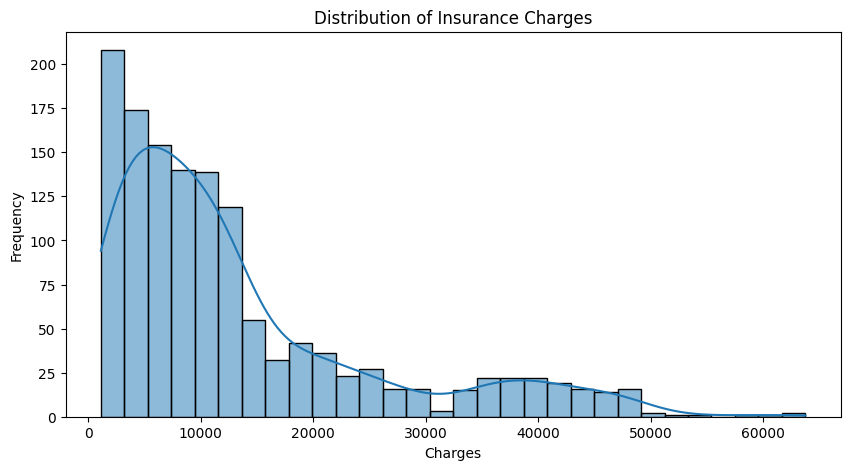

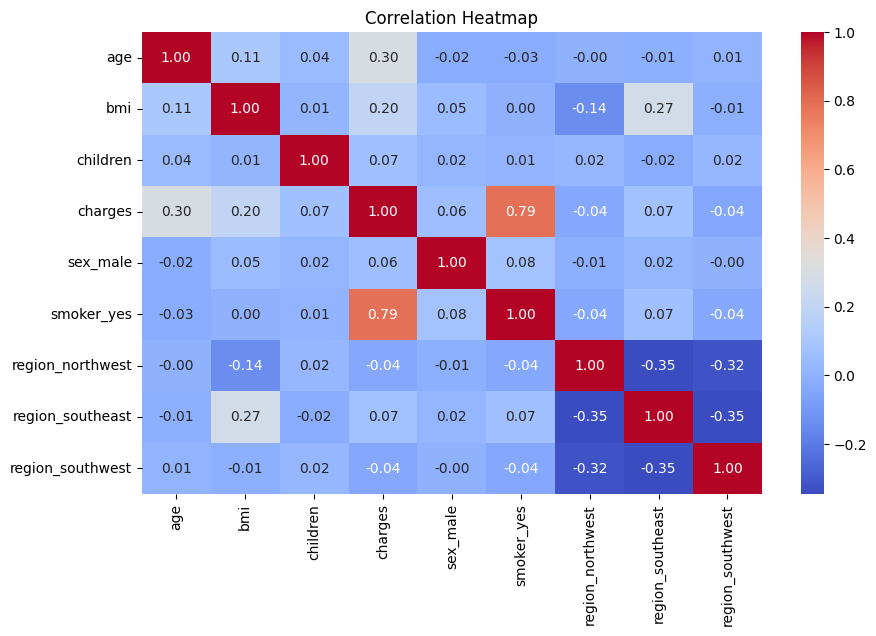

In [5]:
# Step 3: Convert categorical variables into dummy variables

df_encoded = pd.get_dummies(df, drop_first=True)

# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Heatmap to check correlation using the encoded dataframe
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

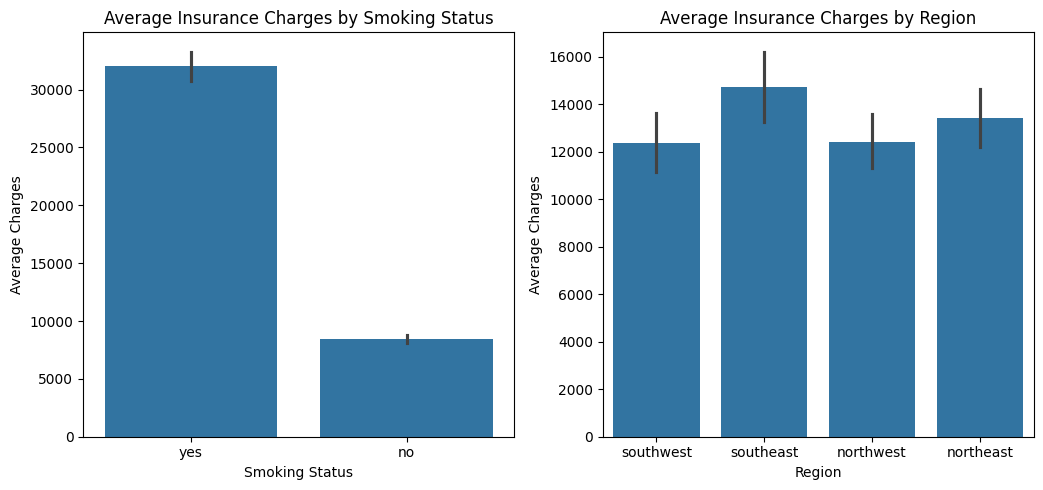

In [8]:
# Step 4: Histograms and Bar Plots to understand the impact of categorical features on charges
plt.figure(figsize=(15, 5))

# Bar plot for smoker status
plt.subplot(1, 3, 2)
sns.barplot(x='smoker', y='charges', data=df, estimator=np.mean)
plt.title('Average Insurance Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')

# Bar plot for region
plt.subplot(1, 3, 3)
sns.barplot(x='region', y='charges', data=df, estimator=np.mean)
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()



In [9]:
# Step 5: Data preprocessing
# Separating features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# One-hot encoding for categorical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Creating a preprocessor for both categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])



In [10]:
# Step 6: Create the ML model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Fit the model
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)




In [11]:
# Step 10: Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')



Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
R-squared (R2): 0.78


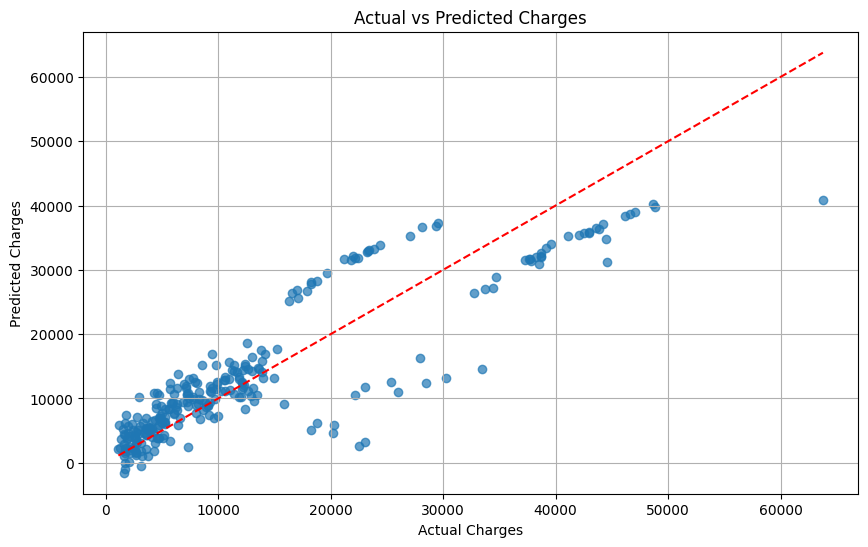

In [12]:
# Step 11: Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # line of equality
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid()
plt.show()